In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd
import cv2
import requests
from io import BytesIO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Q2

In [ ]:
X = [16, 27, 11, 20, 30, 25, 5, 24, 21, 10]
Y = [46, 80, 36, 52, 98, 75, 10, 70, 64, 30]

mean_X = np.mean(X)
mean_Y = np.mean(Y)

var_X = np.var(X)
var_Y = np.var(Y)

cov_XY = np.cov(X, Y)[0, 1]

corr_XY = np.corrcoef(X, Y)[0, 1]

print("Mean of X:", mean_X)
print("Mean of Y:", mean_Y)
print("Variance of X:", var_X)
print("Variance of Y:", var_Y)
print("Covariance of X and Y:", cov_XY)
print("Correlation of X and Y:", corr_XY)

NameError: name 'np' is not defined

### Q3

In [ ]:
def extract_features_from_url(image_url):
    response = requests.get(image_url)
    image = np.asarray(bytearray(response.content), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    mean = cv2.mean(image)
    return [mean[0], mean[1], mean[2]]

features = []
labels = []
for i in range(1, 65):
    features.append(extract_features_from_url('https://raw.githubusercontent.com/modos/ML-AI/refs/heads/main/datasets/united_chelsea_images/c' + str(i) + '.jpg'))
    labels.append(0)
for i in range(1, 59):
    features.append(extract_features_from_url('https://raw.githubusercontent.com/modos/ML-AI/refs/heads/main/datasets/united_chelsea_images/m' + str(i) + '.jpg'))
    labels.append(1)


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.96
Precision: 1.0
Recall: 0.8888888888888888
F1-score: 0.9411764705882353


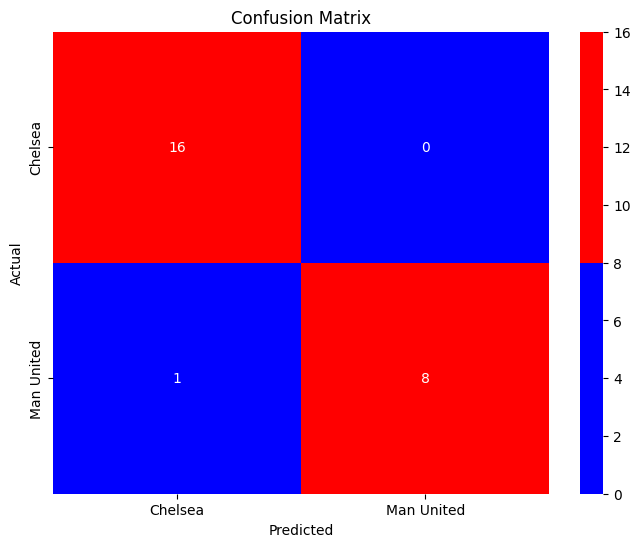

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cmap = sns.color_palette(["blue", "red"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap,
            xticklabels=["Chelsea", "Man United"],
            yticklabels=["Chelsea", "Man United"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Q4

#### Linear Regression

In [ ]:
x = np.arange(-10, 10, 0.2)
y = 2 * np.cos(x) / (-np.pi) + 2 * np.sin(2 * x) / (2 * np.pi) + 2 * np.cos(3 * x) / (-3 * np.pi)

k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=42)

mse_list = []

for train_index, test_index in kf.split(x):
  X_train, X_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = LinearRegression()

  model.fit(X_train.reshape(-1, 1), y_train)

  y_pred = model.predict(X_test.reshape(-1, 1))


  mse = mean_squared_error(y_test, y_pred)

  mse_list.append(mse)

avg_mse = np.mean(mse_list)

print("Average Mean Squared Error:", avg_mse)

Average Mean Squared Error: 0.3061427445490536


#### Polynomial Regression

In [ ]:
x = np.arange(-10, 10, 0.2)
y = 2 * np.cos(x) / (-np.pi) + 2 * np.sin(2 * x) / (2 * np.pi) + 2 * np.cos(3 * x) / (-3 * np.pi)

degree = 3

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_list = []

for train_index, test_index in kf.split(x):
  X_train, X_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  poly_features = PolynomialFeatures(degree=degree)

  X_train_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
  X_test_poly = poly_features.transform(X_test.reshape(-1, 1))

  model = LinearRegression()

  model.fit(X_train_poly, y_train)

  y_pred = model.predict(X_test_poly)

  mse = mean_squared_error(y_test, y_pred)

  mse_list.append(mse)

avg_mse = np.mean(mse_list)

print("Average Mean Squared Error:", avg_mse)

Average Mean Squared Error: 0.31315210042111474


#### Ridge Regression

In [ ]:
x = np.arange(-10, 10, 0.2)
y = 2 * np.cos(x) / (-np.pi) + 2 * np.sin(2 * x) / (2 * np.pi) + 2 * np.cos(3 * x) / (-3 * np.pi)

degree = 3

alpha = 0.5

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_list = []

for train_index, test_index in kf.split(x):
  X_train, X_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  poly_features = PolynomialFeatures(degree=degree)

  X_train_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
  X_test_poly = poly_features.transform(X_test.reshape(-1, 1))

  model = Ridge(alpha=alpha)

  model.fit(X_train_poly, y_train)

  y_pred = model.predict(X_test_poly)

  mse = mean_squared_error(y_test, y_pred)

  mse_list.append(mse)

avg_mse = np.mean(mse_list)

print("Average Mean Squared Error:", avg_mse)

Average Mean Squared Error: 0.31313622007161973


best alpha: 1000.0


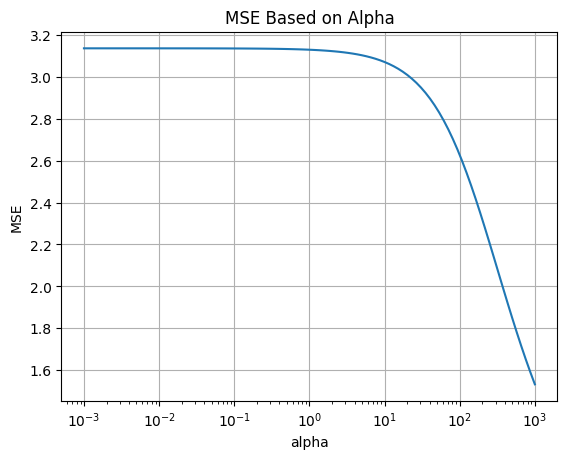

In [ ]:
x = np.arange(-10, 10, 0.2)
y = 2 * np.cos(x) / (-np.pi) + 2 * np.sin(2 * x) / (2 * np.pi) + 2 * np.cos(3 * x) / (-3 * np.pi)

alpha_range = np.logspace(-3, 3, 100)

param_grid = {'alpha': alpha_range}

grid = GridSearchCV(Ridge(), param_grid, cv=5)

poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(x.reshape(-1, 1))

grid.fit(X_poly, y)

best_alpha = grid.best_params_['alpha']
print("best alpha:", best_alpha)

results = pd.DataFrame({'alpha': alpha_range, 'mean_test_score': -grid.cv_results_['mean_test_score']})

plt.plot(results['alpha'], results['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE Based on Alpha')
plt.grid(True)
plt.show()